In [1]:
#Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

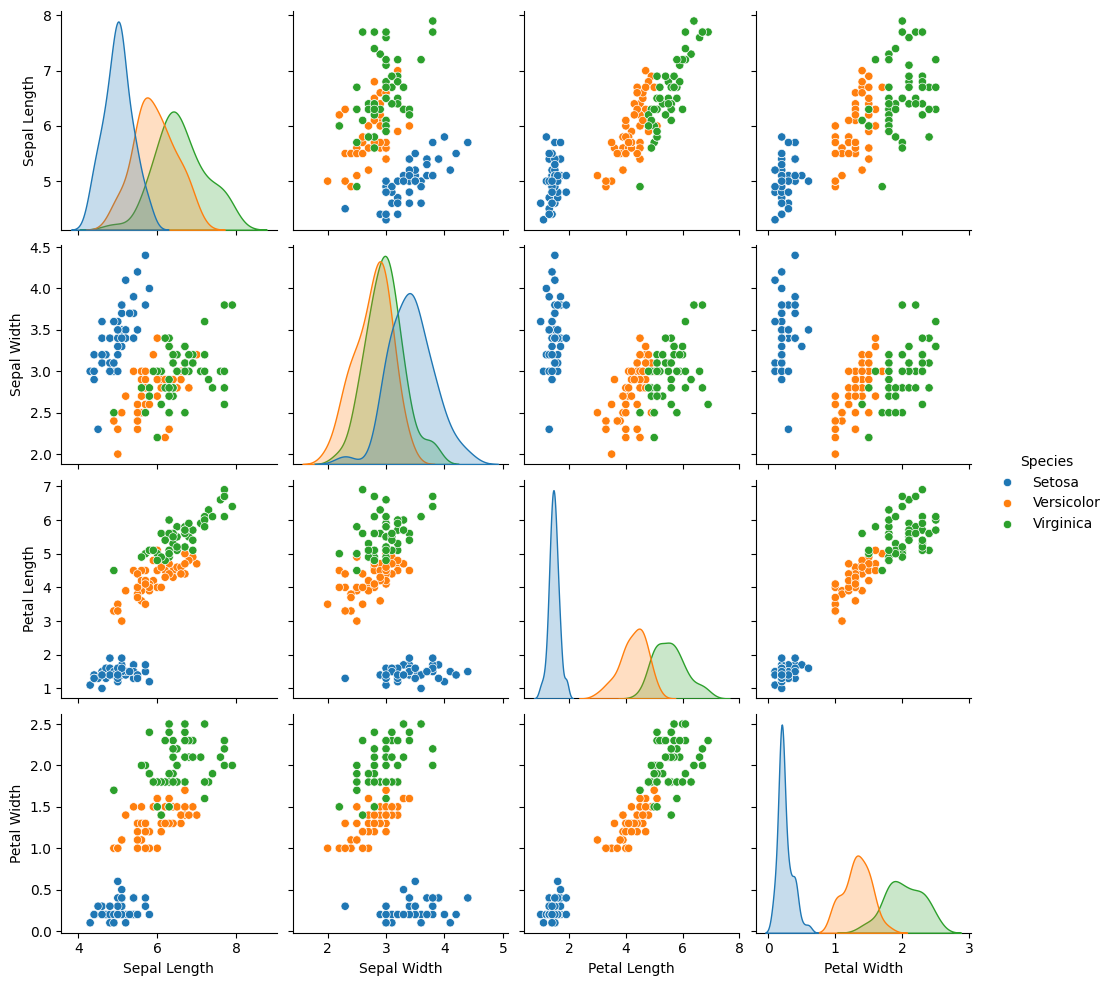

In [3]:
#Pairplot with seaborn for every species
import seaborn as sns
df = pd.DataFrame(data=X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['Species'] = pd.Categorical.from_codes(y, categories=['Setosa', 'Versicolor', 'Virginica'])
sns.pairplot(df, hue='Species')
plt.show()

In [4]:
#Only taking two features i.e sepal length and sepal width and two targets Versicolor and Virginica
X = X[y != 0, :2]
y = y[y != 0]

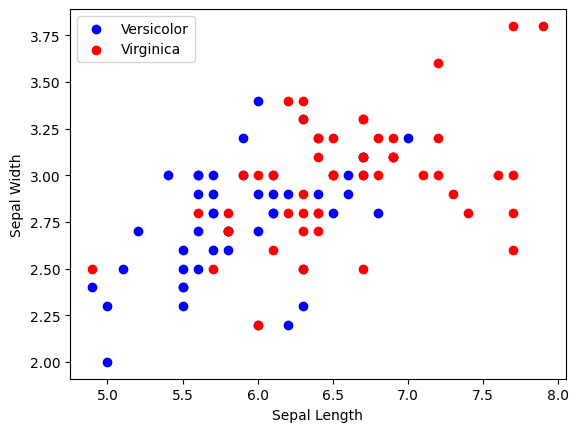

In [5]:
#Visualizing the two classes
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

In [6]:
#Running independent classifier first to see the performance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8


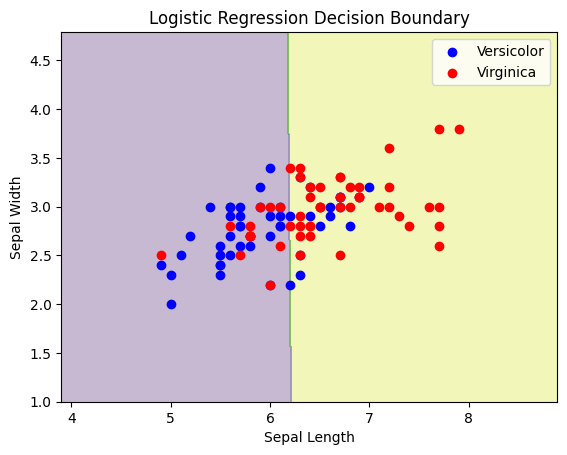

In [7]:
#Drawing decision boundary for Logistic Regression
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [29]:
#Creating Bootstrap samples and training Decision Tree on each sample
from sklearn.tree import DecisionTreeClassifier
#Creating 6 bootstrap samples each with 30,20,60 and 40 samples respectively
n_samples = X_train.shape[0]
n_bootstrap_samples = 6
bootstrap_sizes = [60,60,60,60,60,60]
bootstrap_samples = []
for size in bootstrap_sizes:
    indices = np.random.choice(n_samples, size=size, replace=True)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train[indices]
    bootstrap_samples.append((X_bootstrap, y_bootstrap))

In [30]:
#Creating four decision tree classifiers and training them on bootstrap samples
dt_classifiers = []
for i in range(n_bootstrap_samples):
    dt_clf = DecisionTreeClassifier()
    X_bootstrap, y_bootstrap = bootstrap_samples[i]
    dt_clf.fit(X_bootstrap, y_bootstrap)
    dt_classifiers.append(dt_clf)

In [31]:
dt_classifiers

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier()]

Decision Tree 1 Accuracy: 0.5


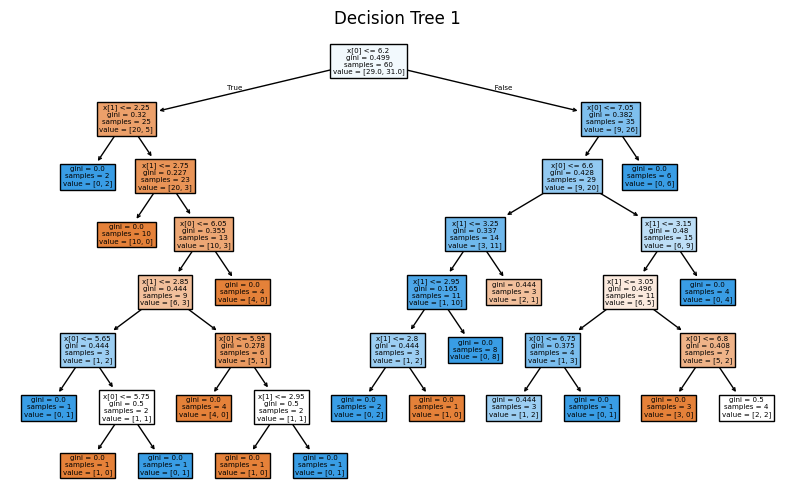

Decision Tree 2 Accuracy: 0.65


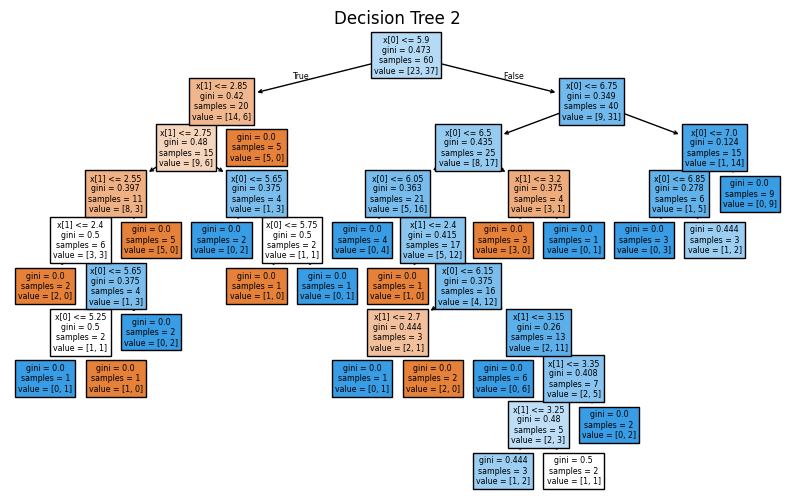

Decision Tree 3 Accuracy: 0.6


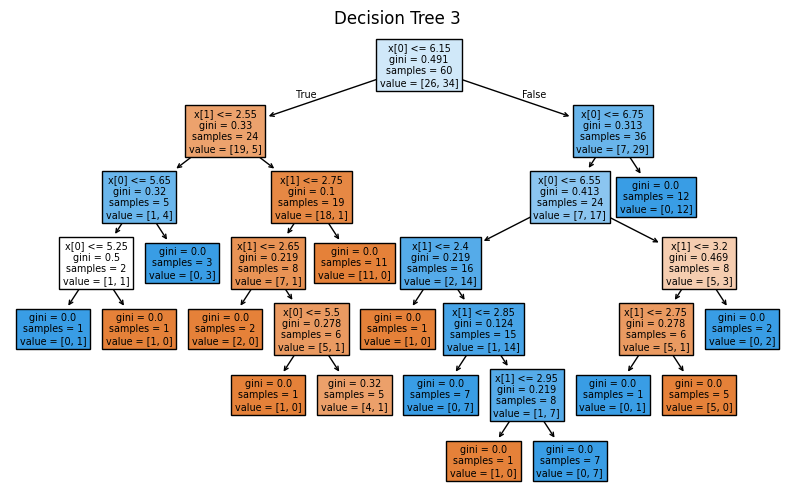

Decision Tree 4 Accuracy: 0.5


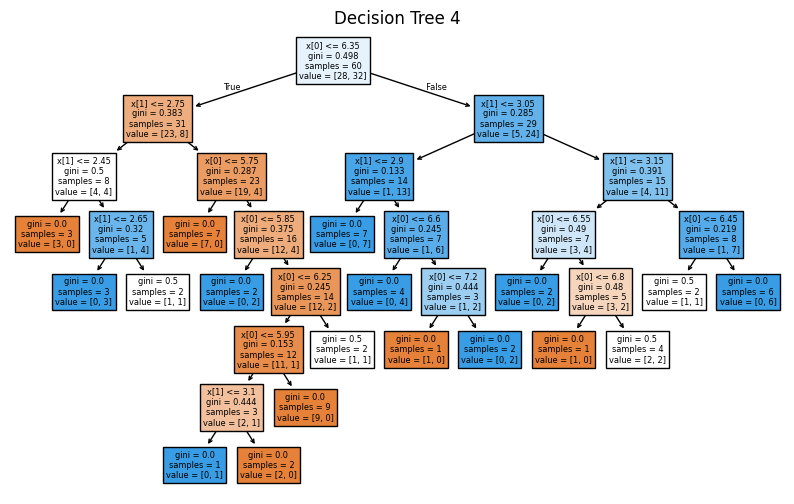

Decision Tree 5 Accuracy: 0.5


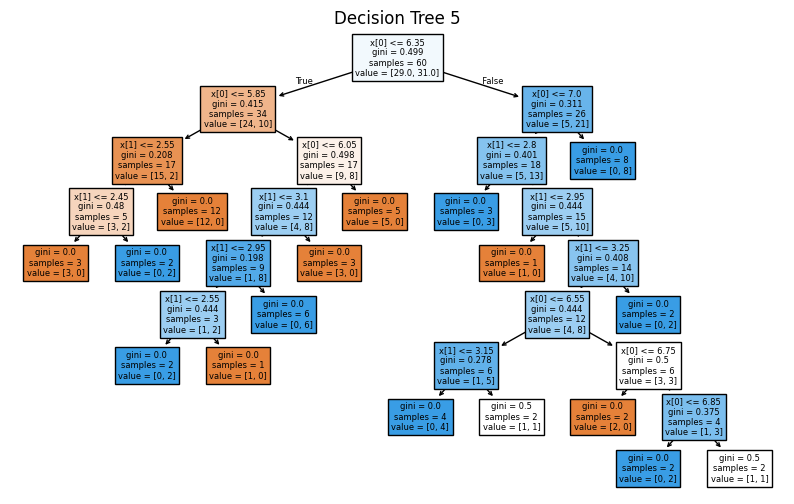

Decision Tree 6 Accuracy: 0.55


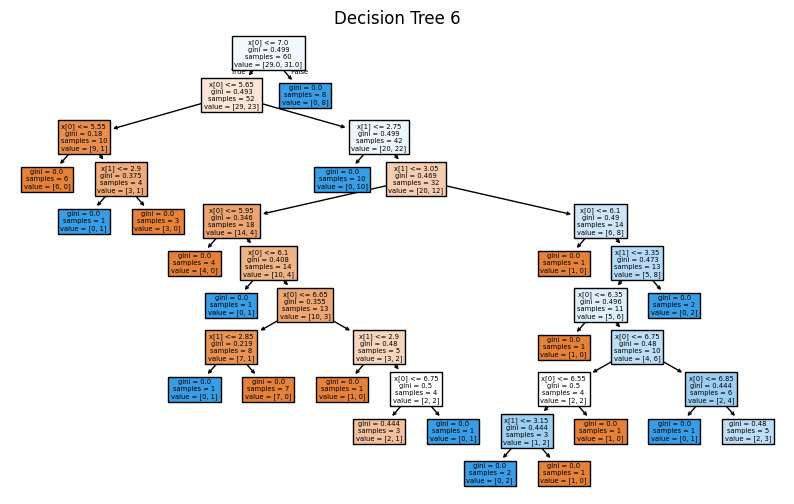

In [32]:
#Observing tree and accuracy_score for each decision tree
from sklearn import tree
for i, dt_clf in enumerate(dt_classifiers):
    y_pred = dt_clf.predict(X_test)
    print(f"Decision Tree {i+1} Accuracy:", accuracy_score(y_test, y_pred))
    plt.figure(figsize=(10,6))
    tree.plot_tree(dt_clf, filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

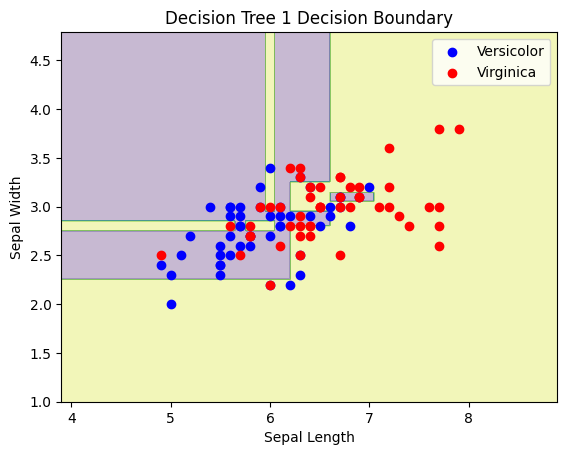

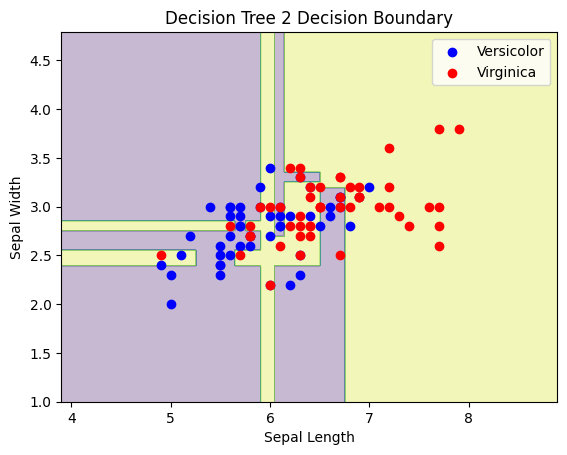

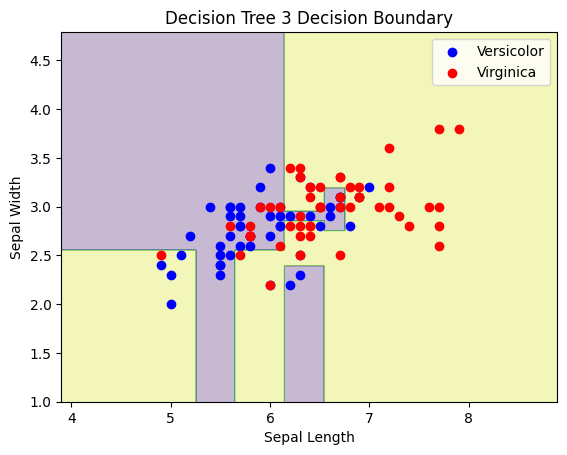

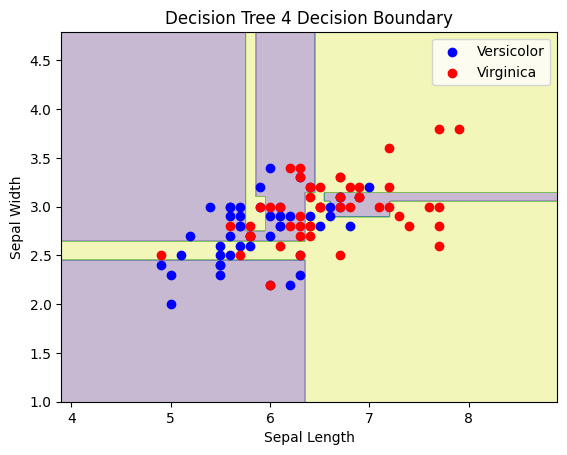

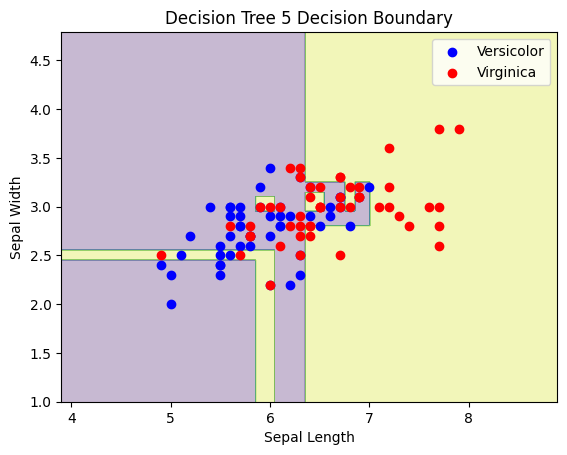

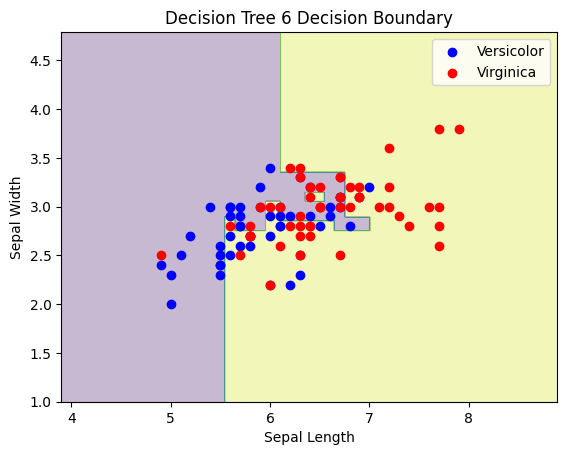

In [33]:
#Plotting decision boundary for each decision tree
for i, dt_clf in enumerate(dt_classifiers):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
    Z = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
    plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title(f'Decision Tree {i+1} Decision Boundary')
    plt.show()

In [39]:
#Observing accuracy_score by using Mode on the decision trees
from scipy.stats import mode
y_preds = np.array([dt_clf.predict(X_test) for dt_clf in dt_classifiers])
y_pred_ensemble, _ = mode(y_preds, axis=0)
y_pred_ensemble = y_pred_ensemble.flatten()
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.6


In [40]:
X_test,y_test

(array([[6.3, 2.8],
        [6.3, 2.9],
        [6.9, 3.2],
        [5.7, 3. ],
        [5.6, 2.7],
        [5.5, 2.5],
        [6.3, 2.5],
        [7.4, 2.8],
        [5. , 2. ],
        [7. , 3.2],
        [6.2, 2.2],
        [5.5, 2.4],
        [6.3, 2.7],
        [6. , 2.7],
        [6.7, 3.1],
        [6.5, 2.8],
        [6.2, 2.8],
        [6.1, 3. ],
        [6. , 2.2],
        [5.5, 2.4]]),
 array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1]))

In [41]:
#Checking prediction for [6.3, 2.7] in each classifier
for i, dt_clf in enumerate(dt_classifiers):
    pred = dt_clf.predict([[6.3, 2.8]])
    print(f"Decision Tree {i+1}", pred)

Decision Tree 1 [2]
Decision Tree 2 [2]
Decision Tree 3 [2]
Decision Tree 4 [1]
Decision Tree 5 [1]
Decision Tree 6 [2]


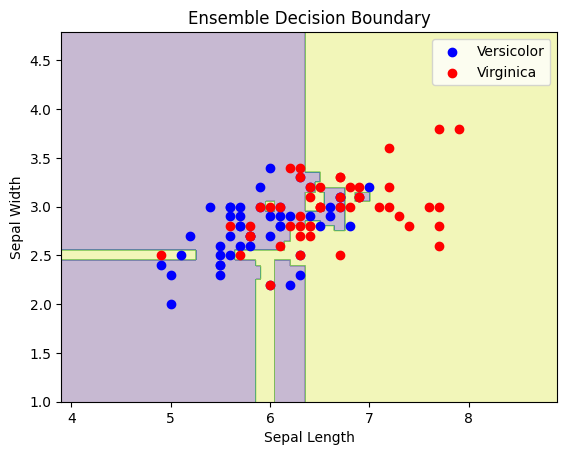

In [44]:
#Plotting decision boundary for combined dts, first taking mode of predictions then plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z_preds = np.array([dt_clf.predict(np.c_[xx.ravel(), yy.ravel()]) for dt_clf in dt_classifiers])
Z_mode, _ = mode(Z_preds, axis=0)
Z_mode = Z_mode.reshape(xx.shape)
plt.contourf(xx, yy, Z_mode, alpha=0.3)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Ensemble Decision Boundary')
plt.show()

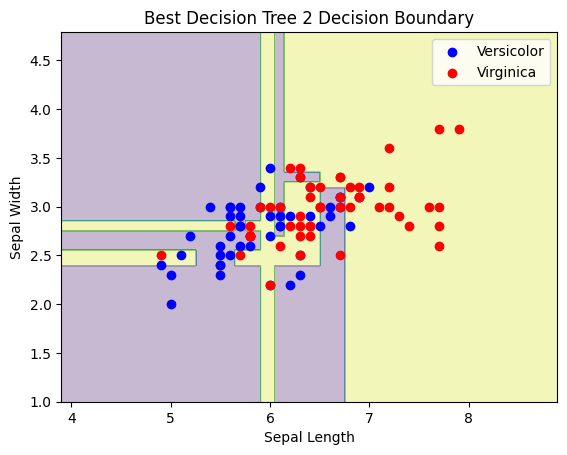

Accuracy of Best Decision Tree: 0.65


In [46]:
#Plotting decision boundary for the one with maximum accuracy
accuracies = [accuracy_score(y_test, dt_clf.predict(X_test)) for dt_clf in dt_classifiers]
best_clf_index = np.argmax(accuracies)
best_clf = dt_classifiers[best_clf_index]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title(f'Best Decision Tree {best_clf_index+1} Decision Boundary')
plt.show()
print("Accuracy of Best Decision Tree:", accuracies[best_clf_index])

In [47]:
#Trying bootstraping with replacement for 100 classifiers with 50 rows in each samples
n_bootstrap_samples = 100
bootstrap_sizes = [50]*n_bootstrap_samples
bootstrap_samples = []
for size in bootstrap_sizes:
    indices = np.random.choice(n_samples, size=size, replace=True)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train[indices]
    bootstrap_samples.append((X_bootstrap, y_bootstrap))


In [49]:
#Creating 100 decision tree classifiers and training them on bootstrap samples
dt_classifiers = []
for i in range(n_bootstrap_samples):
    dt_clf = DecisionTreeClassifier()
    X_bootstrap, y_bootstrap = bootstrap_samples[i]
    dt_clf.fit(X_bootstrap, y_bootstrap)
    dt_classifiers.append(dt_clf)

Decision Tree 1 Accuracy: 0.65
Decision Tree 2 Accuracy: 0.6
Decision Tree 3 Accuracy: 0.45
Decision Tree 4 Accuracy: 0.5
Decision Tree 5 Accuracy: 0.4
Decision Tree 6 Accuracy: 0.7
Decision Tree 7 Accuracy: 0.6
Decision Tree 8 Accuracy: 0.55
Decision Tree 9 Accuracy: 0.5
Decision Tree 10 Accuracy: 0.5
Decision Tree 11 Accuracy: 0.55
Decision Tree 12 Accuracy: 0.45
Decision Tree 13 Accuracy: 0.65
Decision Tree 14 Accuracy: 0.6
Decision Tree 15 Accuracy: 0.4
Decision Tree 16 Accuracy: 0.5
Decision Tree 17 Accuracy: 0.6
Decision Tree 18 Accuracy: 0.6
Decision Tree 19 Accuracy: 0.45
Decision Tree 20 Accuracy: 0.6
Decision Tree 21 Accuracy: 0.65
Decision Tree 22 Accuracy: 0.65
Decision Tree 23 Accuracy: 0.55
Decision Tree 24 Accuracy: 0.65
Decision Tree 25 Accuracy: 0.55
Decision Tree 26 Accuracy: 0.5
Decision Tree 27 Accuracy: 0.6
Decision Tree 28 Accuracy: 0.55
Decision Tree 29 Accuracy: 0.45
Decision Tree 30 Accuracy: 0.45
Decision Tree 31 Accuracy: 0.65
Decision Tree 32 Accuracy: 0.5
D

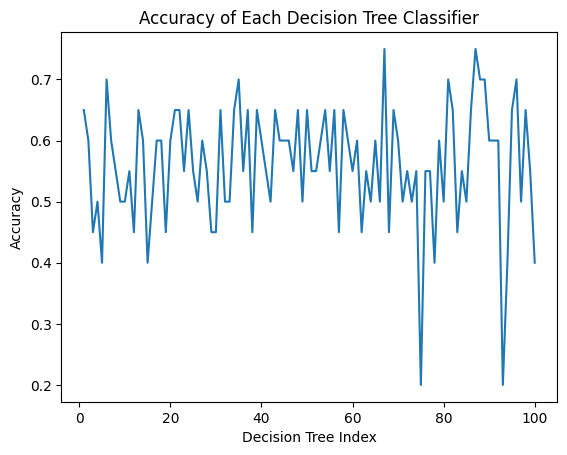

In [51]:
#Testing accuracy on each model and plotting graph with accuracies
accuracies = []
for i, dt_clf in enumerate(dt_classifiers):
    y_pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Decision Tree {i+1} Accuracy:", acc)
plt.plot(range(1, n_bootstrap_samples+1), accuracies)
plt.xlabel('Decision Tree Index')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Decision Tree Classifier')
plt.show()

In [52]:
#Finding model with highest accuracy
best_clf_index = np.argmax(accuracies)
best_clf = dt_classifiers[best_clf_index]
print("Best Decision Tree Index:", best_clf_index+1)
print("Accuracy of Best Decision Tree:", accuracies[best_clf_index])

Best Decision Tree Index: 67
Accuracy of Best Decision Tree: 0.75


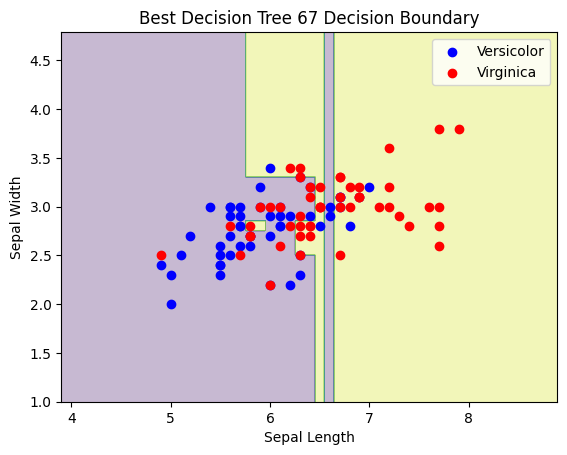

In [54]:
#Building decision boundary for best decision tree
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title(f'Best Decision Tree {best_clf_index+1} Decision Boundary')
plt.show()

In [53]:
#Building ensemble prediction using mode
from scipy.stats import mode
y_preds = np.array([dt_clf.predict(X_test) for dt_clf in dt_classifiers])
y_pred_ensemble, _ = mode(y_preds, axis=0)
y_pred_ensemble = y_pred_ensemble.flatten()
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.55


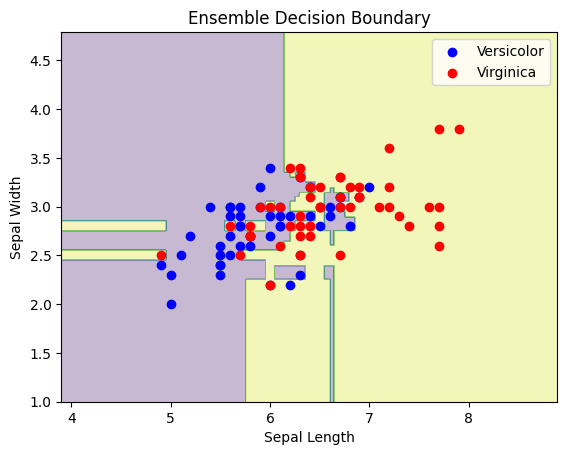

In [55]:
#Building decision boundary for ensemble model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z_preds = np.array([dt_clf.predict(np.c_[xx.ravel(), yy.ravel()]) for dt_clf in dt_classifiers])
Z_mode, _ = mode(Z_preds, axis=0)
Z_mode = Z_mode.reshape(xx.shape)
plt.contourf(xx, yy, Z_mode, alpha=0.3)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Ensemble Decision Boundary')
plt.show()

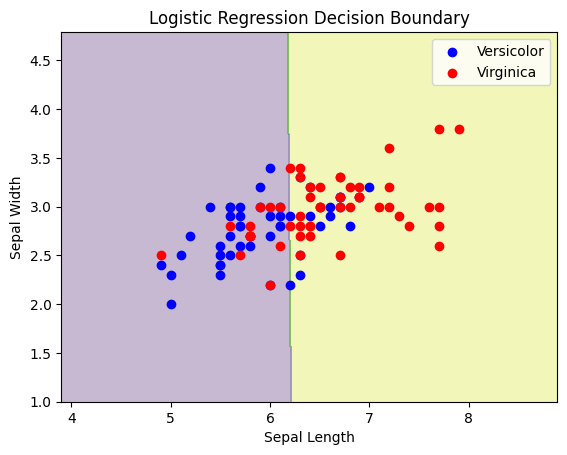

In [58]:
#Drawing decision boundary for Logistic Regression
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [94]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    estimator=LogisticRegression(), 
    n_estimators=100,
    max_samples=60,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# Evaluate the bagging classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy}")

Bagging Classifier Accuracy: 0.8


In [98]:
bag_clf.oob_score_ #Some rows were not included in bootstrap samples so they can be used to validate the model

0.7125

In [104]:
#Let's apply GridSearchCV to find the best hyperparameters for BaggingClassifier
#Importing SVM Classifier
from sklearn.svm import SVC as SVMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'estimator': [LogisticRegression(),DecisionTreeClassifier(),SVMClassifier()],
    'n_estimators': [40,50, 100, 150],
    'max_samples': [40, 60, 80],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(BaggingClassifier(n_jobs=-1), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_bag_clf = grid_search.best_estimator_
y_pred = best_bag_clf.predict(X_test)
print("Accuracy with best parameters:", accuracy_score(y_test, y_pred)) 


Best parameters found:  {'bootstrap': True, 'estimator': LogisticRegression(), 'max_samples': 40, 'n_estimators': 40}
Accuracy with best parameters: 0.75


/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
60 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^